In [1]:
include("../functions.jl")
println("Avaliable threads: ", Threads.nthreads())

Avaliable threads: 32


In [2]:
## Initialize 

branchN = 100
a1Vals = collect(range(0.01, 0.23, branchN + 1))

# Define the values for the parameters
N = 36
L = π
b = 0.1

# Create an instance of the Constants struct
constants = kirchhoffLoveConstants(N, L, b)

# initialize wave speed and wave number 
k1 = 1*π/constants.L
cInitial = c0(k1, constants)

# initial guess 
initial_guess = (1e-16).*ones(branchN+1, constants.N+2)
initial_guess[1,1:4] = [cInitial, 1.0, a1Vals[1], 1e-16]

4-element Vector{Float64}:
 0.665752044634463
 1.0
 0.01
 1.0e-16

Solution branch already exists.
File: /home/karnav/Documents/kylindros/results/library/kirchhoffLove/kirchhoffLove_2710223338_N36.jld2
  3.704297 seconds (13.86 M allocations: 711.796 MiB, 1.91% gc time, 99.93% compilation time: 11% of which was recompilation)


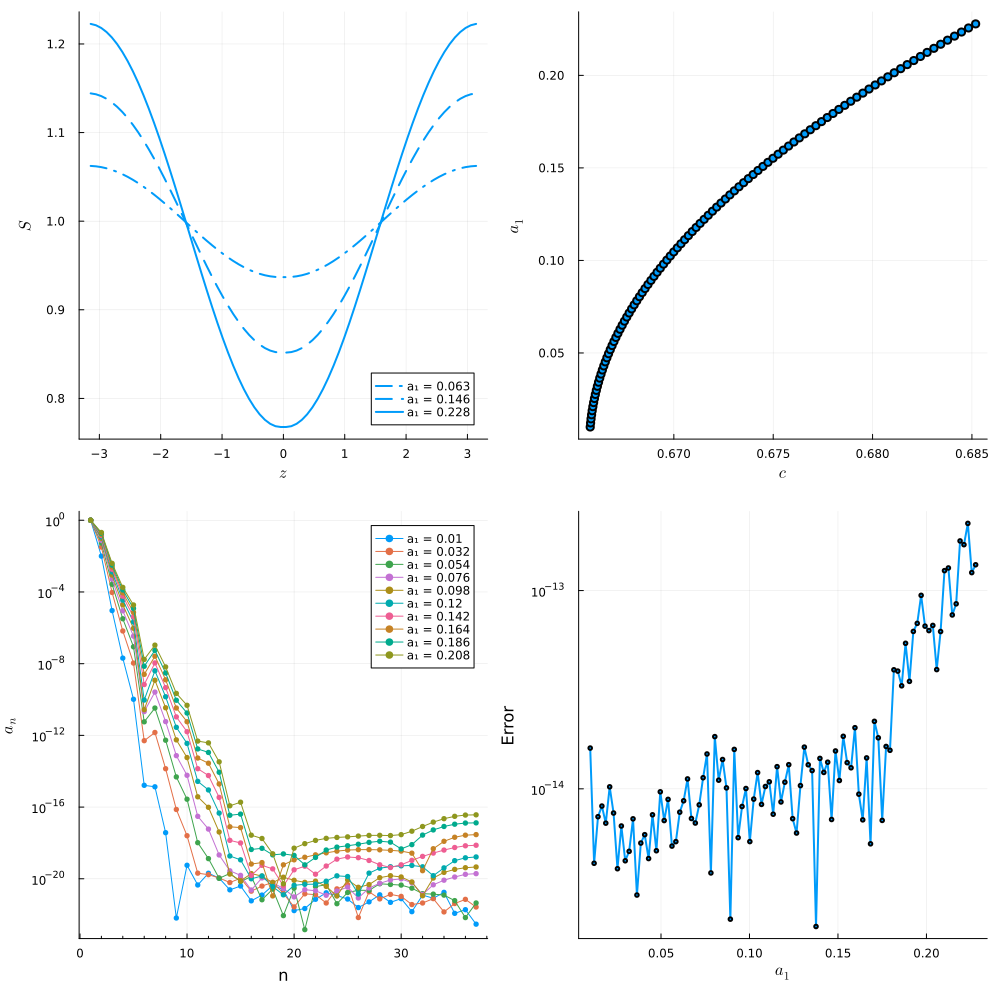

In [3]:
## Compute solution branch
@time solutions, constants, metadata = bifurcation(initial_guess, a1Vals, branchN, constants, tol = 1e-14, solver = :NLSolver, max_iter = 1000, overwrite = false);

plotEverything(solutions, constants, metadata)

Plotting all 17 branches


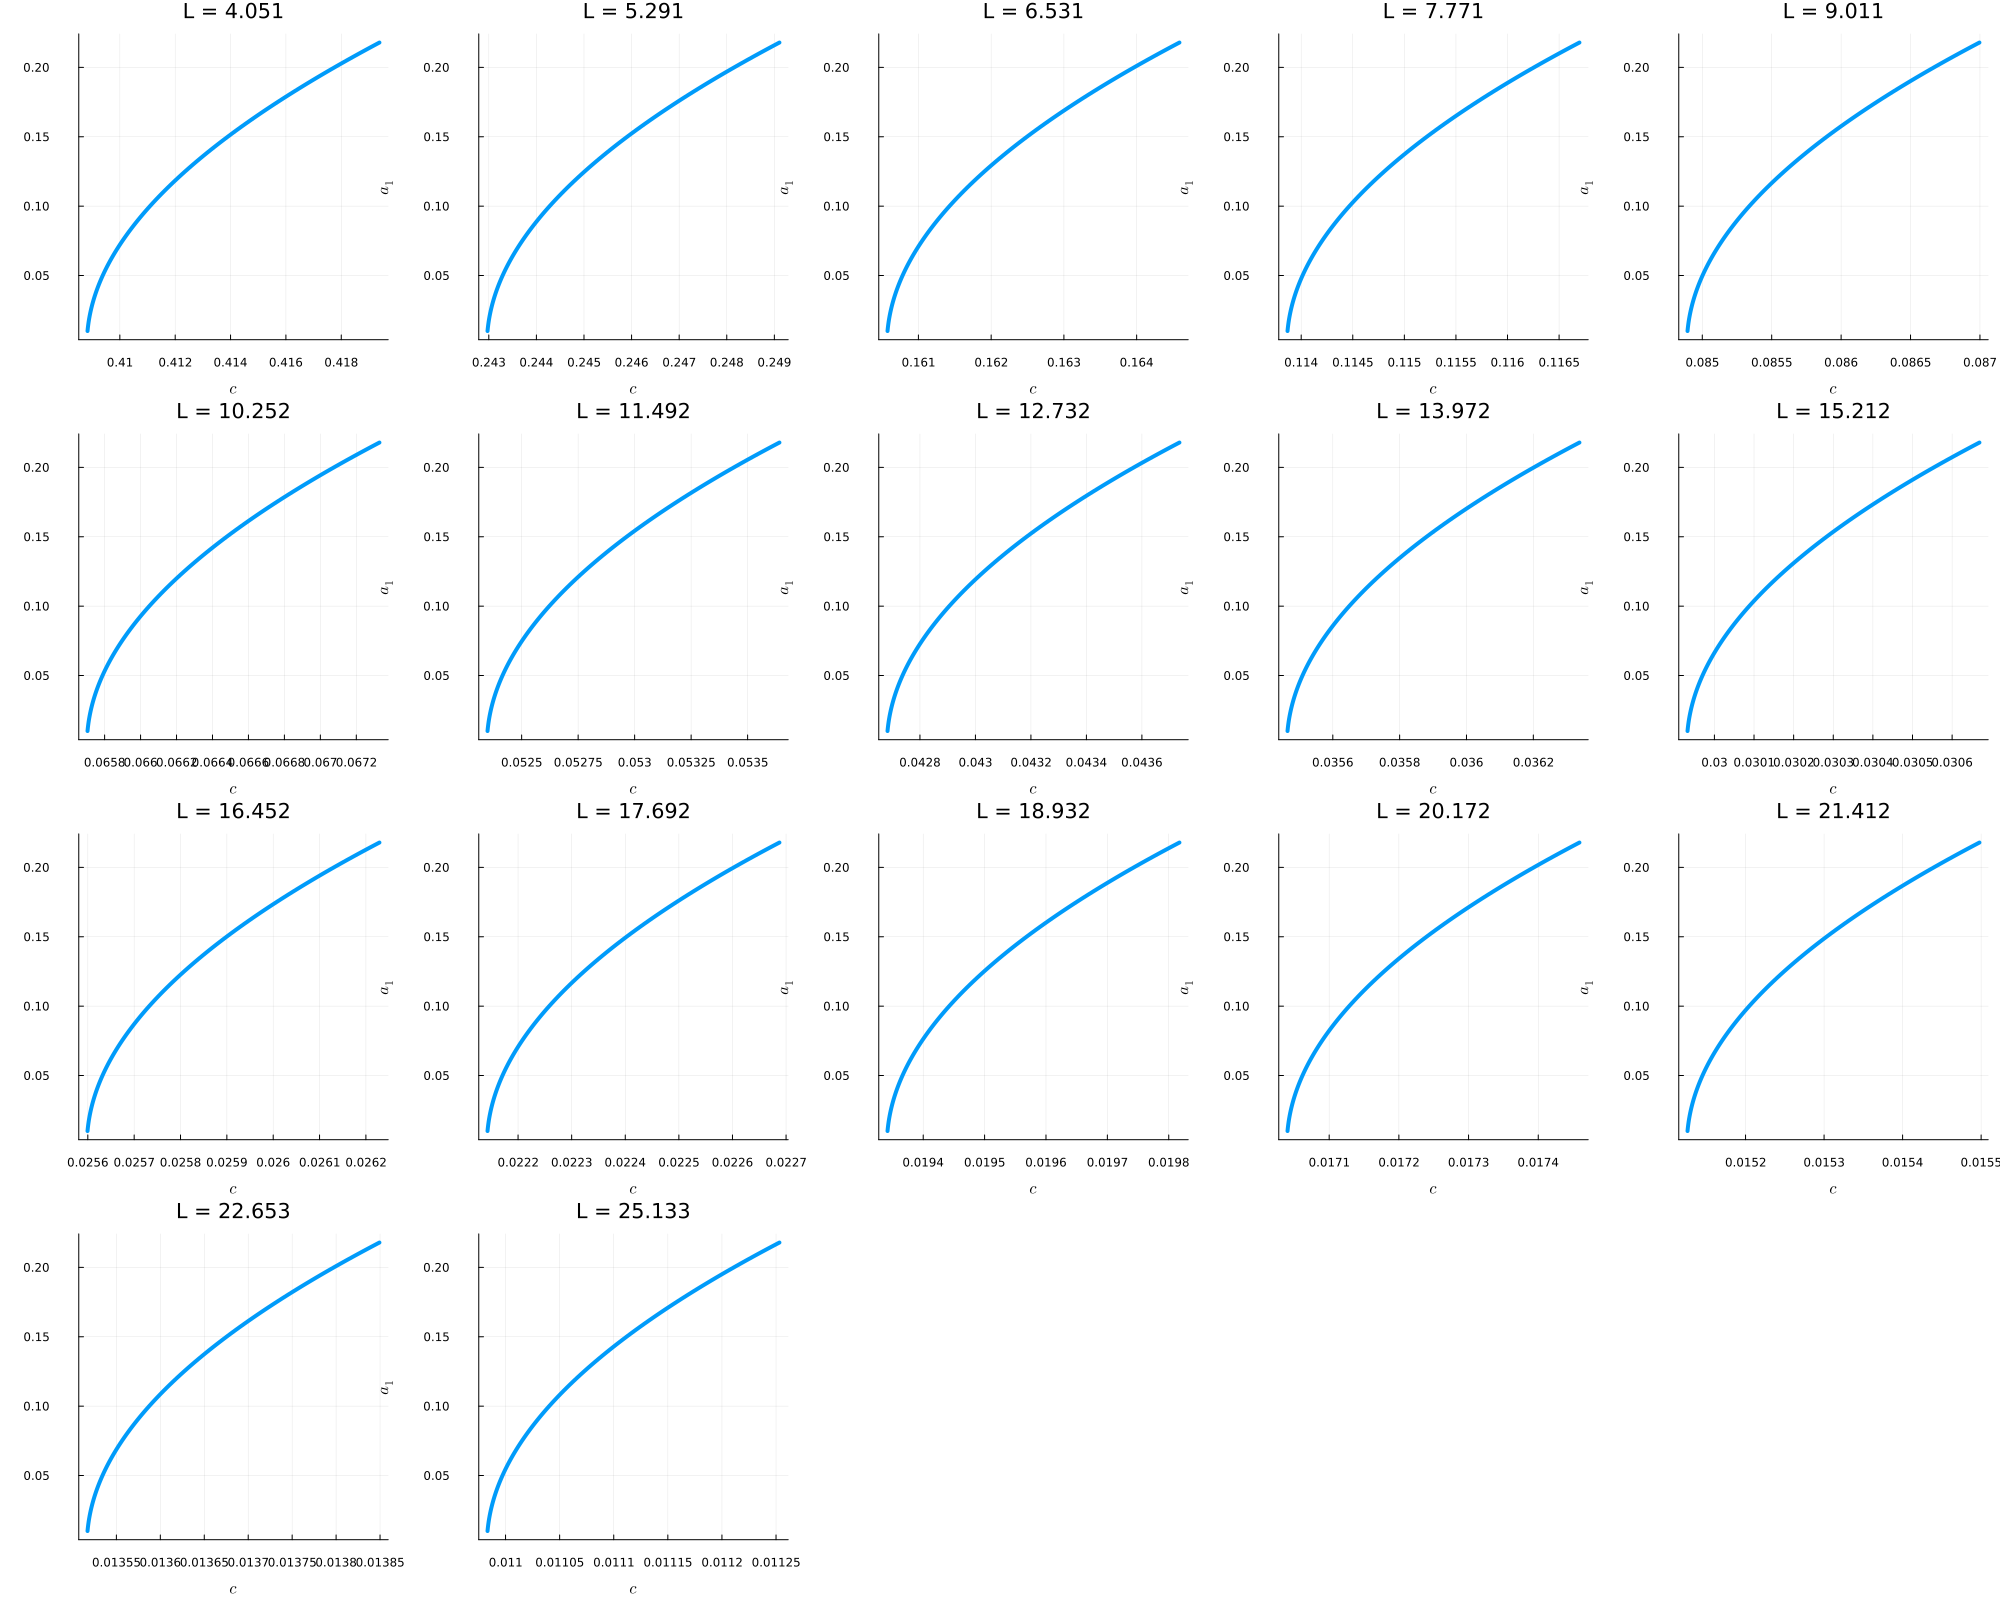

In [4]:
path = "/home/karnav/Documents/kylindros/results/experiments/kl_grid_search"
plotBranchVariationsSubplots(path)

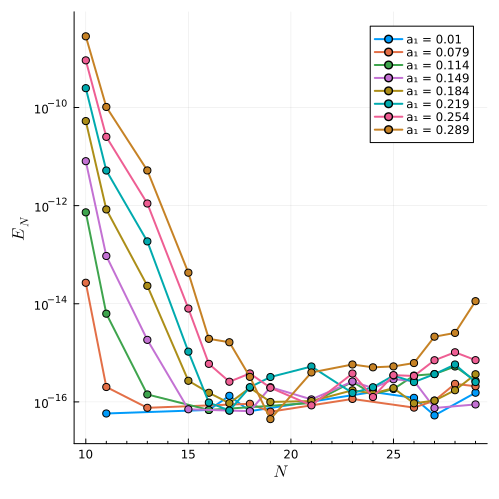

In [5]:
path = "/home/karnav/Documents/kylindros/results/experiments/kl_vary_coeffs"
plot_cauchy_error(path, indices = [1, 50, 75, 100, 125, 150, 175, 200], yscale = :log10, step = 2)

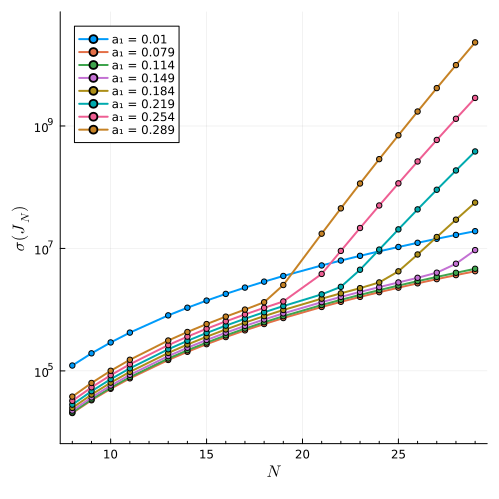

In [6]:
path = "/home/karnav/Documents/kylindros/results/experiments/kl_vary_coeffs"

plot_metric_vs_N(path, indices = [1, 50, 75, 100, 125, 150, 175, 200], metric = :condition, legend_position = :topleft, step = 2)